In [245]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functions import *
from sklearn.model_selection import train_test_split

%load_ext autoreload
%autoreload 2

# Load data
data = pd.read_csv('Data/non_nan_data.csv')
data = data.drop(['sun_mean', 'wind_mean', 'temp_mean'], axis=1)
data = data.drop(['DK1_spot'], axis=1)

# Split data when date < 2020-01-01 21:00:00
data_train = data[data['DATE'] < '2020-01-01'].drop(['DATE'], axis=1).to_numpy()
data_test = data[data['DATE'] >= '2020-01-01'].drop(['DATE'], axis=1).to_numpy()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [246]:
y_train = data_train[:, 0].reshape(-1, 1)
y_test = data_test[:, 0].reshape(-1, 1)


weather_train = data_train[:, 1:-2]
weather_test = data_test[:, 1:-2]

hour_dummies_train = sdummy(len(data_train), 24)
hour_dummies_test = sdummy(len(data_test), 24)

all_train = np.concatenate((weather_train, hour_dummies_train), axis=1)
all_test = np.concatenate((weather_test, hour_dummies_test), axis=1)




## Baseline

In [247]:
p = 3
con = 0
tr = 0
exog = 0
# exog = weather
# exog = hour_dummies_train
# exog = all_train

Beta, SEbeta, _, Pvalue, tratioBeta, _, _, _, aiccrit, hqccrit, siccrit = VARlsExog(y_train, p, con, tr, exog)

# # Collect beta, SEbeta and tratioBeta in a single dataframe
results = pd.DataFrame()
results['Beta'] = Beta.reshape(-1, order='F')


X_test = np.column_stack([lagmatrix(y_test, p)])

y_pred = X_test @ Beta

numerator = np.abs(y_pred - y_test)
denominator = (np.abs(y_test) + np.abs(y_pred)) / 2.0

epsilon = 1e-10  # A small constant to avoid division by zero
denominator = np.where(denominator == 0, epsilon, denominator)

# Calculate sMAPE
smape_values = numerator / denominator
smape = np.mean(smape_values) * 100

smape

17.783053683138423

## Extended baseline with weather data

In [248]:
p = 3
con = 0
tr = 0
exog = 0
# exog = weather
# exog = hour_dummies_train
exog = all_train

Beta, SEbeta, _, Pvalue, tratioBeta, _, _, _, aiccrit, hqccrit, siccrit = VARlsExog(y_train, p, con, tr, exog)

# # Collect beta, SEbeta and tratioBeta in a single dataframe
results = pd.DataFrame()
results['Beta'] = Beta.reshape(-1, order='F')


X_test = np.column_stack([lagmatrix(y_test, p), all_test])

y_pred = X_test @ Beta

numerator = np.abs(y_pred - y_test)
denominator = (np.abs(y_test) + np.abs(y_pred)) / 2.0

epsilon = 1e-10  # A small constant to avoid division by zero
denominator = np.where(denominator == 0, epsilon, denominator)

# Calculate sMAPE
smape_values = numerator / denominator
smape = np.mean(smape_values) * 100

smape

18.611986628730783

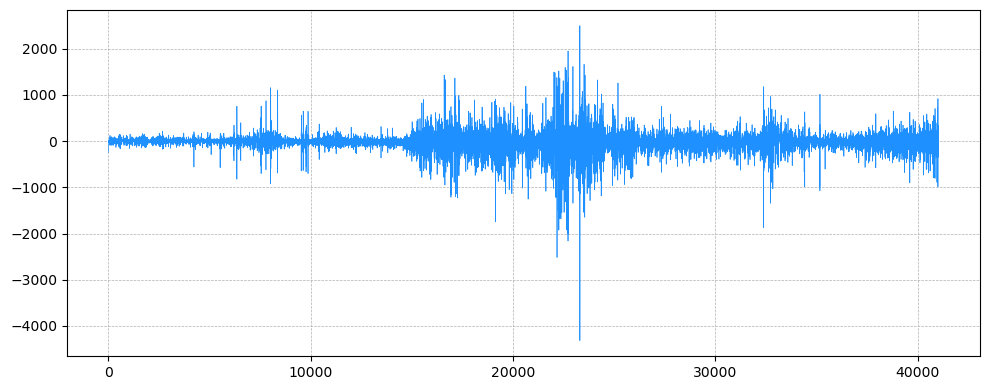

In [249]:
plt.figure(figsize=(10, 4))
plt.plot(difference, color='dodgerblue', linewidth=0.5)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


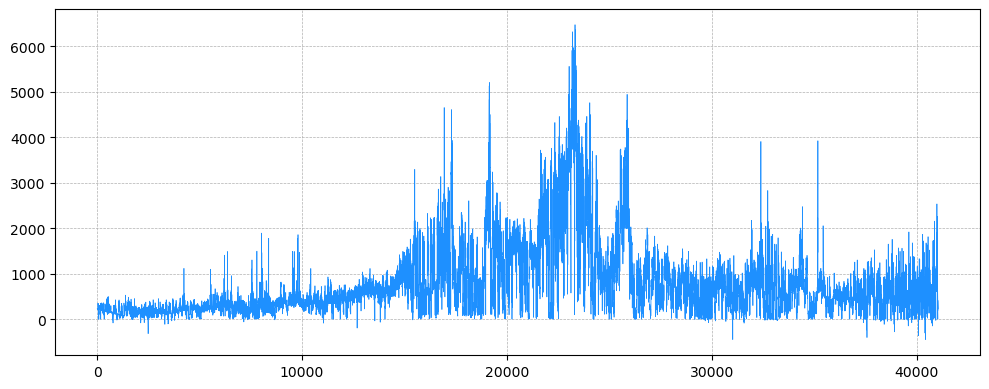

In [250]:
plt.figure(figsize=(10, 4))
plt.plot(y_test, color='dodgerblue', linewidth=0.5)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


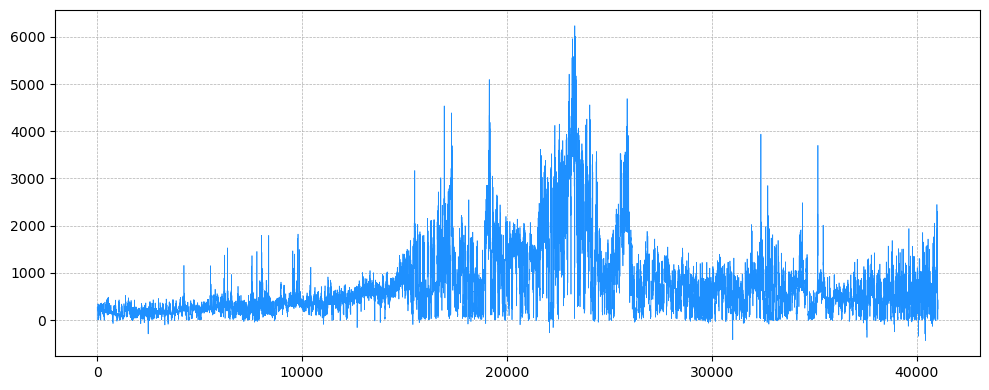

In [251]:
plt.figure(figsize=(10, 4))
plt.plot(y_pred, color='dodgerblue', linewidth=0.5)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()
